# Ejercicio 1

La curtosis de Pearson es: 3.388388460084737
La rango intercuartil es: 1.5543384329563623
La desviacion estandar es: 1.0941664144878025, estimadas por rango 1.3912703164759195


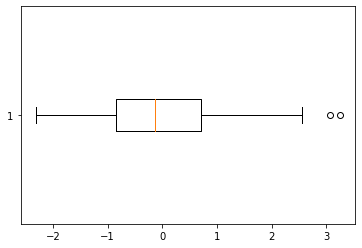

In [37]:
import numpy as np
from scipy.stats import kurtosis, iqr
import matplotlib.pyplot as plt
%matplotlib inline

N = 100
x = np.random.normal(size=N)
kurt = kurtosis(x, fisher=False)
print("La curtosis de Pearson es: {}".format(kurt))
iqr_x = iqr(x)
print("La rango intercuartil es: {}".format(iqr_x))
std_x = np.std(x)
print("La desviacion estandar es: {}, estimadas por rango {}".format(std_x, np.abs(np.max(x) - np.min(x)) / 4))
plt.boxplot(x, vert=False)
plt.show()



# Ejercicio 2

La curtosis de Pearson es: 4.105641577526539
La rango intercuartil es: 0.7649837391978116
La desviacion estandar es: 0.716685716783045, estimadas por rango 0.8118024535580244


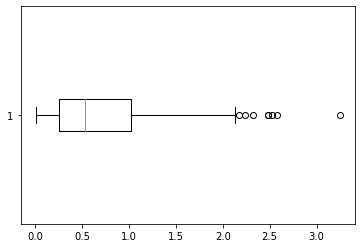

In [40]:
N = 100
x = np.random.exponential(size=N)
kurt = kurtosis(x, fisher=False)
print("La curtosis de Pearson es: {}".format(kurt))
iqr_x = iqr(x)
print("La rango intercuartil es: {}".format(iqr_x))
std_x = np.std(x)
print("La desviacion estandar es: {}, estimadas por rango {}".format(std_x, np.abs(np.max(x) - np.min(x)) / 4))
plt.boxplot(x, vert=False)
plt.show()

# Ejercicio 3

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

data = pd.read_csv("AMZN.csv")
print(data.head())

alpha = 0.05
gain = 0.02

close_prices = data["Close"]
print("\nClosing prices")
print(close_prices.head())

last_price = close_prices.iloc[[-1]]




         Date         Open         High          Low        Close  \
0  2020-11-09  3231.030029  3289.000000  3112.110107  3143.739990   
1  2020-11-10  3095.020020  3114.000000  3019.479980  3035.020020   
2  2020-11-11  3061.780029  3139.149902  3050.000000  3137.389893   
3  2020-11-12  3159.949951  3175.879883  3086.050049  3110.280029   
4  2020-11-13  3122.000000  3141.719971  3085.389893  3128.810059   

     Adj Close   Volume  
0  3143.739990  7190400  
1  3035.020020  6591000  
2  3137.389893  4366900  
3  3110.280029  4362000  
4  3128.810059  3756200  

Closing prices
0    3143.739990
1    3035.020020
2    3137.389893
3    3110.280029
4    3128.810059
Name: Close, dtype: float64


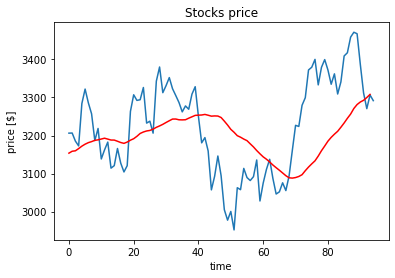

In [50]:
import bottleneck as bn

def moving_average(a, n) :
    return bn.move_mean(a, window=n, min_count=None)

# Plot prices
n = 30
cl_prices = close_prices[n - 1:]
plt.plot(list(cl_prices))
plt.title("Stocks price")
plt.ylabel("price [$]")
plt.xlabel("time")

filt_prices = moving_average(close_prices.to_numpy(), n=n)[n:]
plt.plot(filt_prices, 'r')

In [57]:
# Se obtine Q1 y Q3
ordered = np.sort(filt_prices[n:])
Q1 = ordered[int(np.round_(0.25 * ordered.shape[0]))]
Q3 = ordered[int(np.round_(0.75 * ordered.shape[0]))]
IQR = Q3 - Q1
step = 1.5 * IQR;
print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)
print("step: ", step)

Q1:  3143.9083170000004
Q3:  3249.150634733334
IQR:  105.2423177333335
step:  157.86347660000024


In [70]:
# Se eliminan los outliers
out_inf = Q1 - step
out_sup = Q3 + step
mask = (filt_prices>out_inf) & (filt_prices<out_sup)
filt_prices_red = filt_prices[mask]
# Se calcula el rango
price_range = filt_prices_red[-1] - filt_prices_red[0]
# Se calcula la desviacion standart muestral
s = price_range / 4


In [92]:
# Se obtiene la media muestral
desired_price = last_price * (1 + gain)
rec_mean = np.mean(filt_prices_red)
# Se utiliza un t de student
t_0 = t.ppf(1 - alpha, filt_prices_red.shape[0])

In [99]:
# Se hace un test de hipotesis
minimum_h0 = desired_price.to_numpy() - t_0 * s / np.sqrt(filt_prices_red.shape[0])
print("Media muestral:", rec_mean)
print("Valor minimo:", minimum_h0[0])
if rec_mean > minimum_h0[0]:
    print("Comprar acciones")
else:
    print("No comprar")

Media muestral: 3195.226157397163
Valor minimo: 3350.8301071917617
No comprar
